# MACHINE LEARNING AND DATA SCIENCE: EXAMPLE PROJECT

## INTRODUCTION

The goal of this excercise is to investigate specific features describing chemical properties (e.g. content of alcohol or sulphur) of red and white Portuguese wine samples, and to develop a model that will predict its quality (discrete scores from 0 to 10) based on these features. The task can be approached both as a classification or regression problem, with specific limitations, and both approaches will be demonstrated.

The data come from UC Irvine Machine Learning Repository and are free to download.
More information can be obtained from the following page:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

Let's start with standard imports and then let's obtain both datasets and merge them together, for comparative exploratory data analysis.

## GETTING THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
link_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red = pd.read_csv(link_red, sep=';')

link_white = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white = pd.read_csv(link_white, sep=';')

In [3]:
np.all(red.columns == white.columns) # checking whether all the features are the same for both red and white wine data

True

In [4]:
red['variant'] = 'Red'
white['variant'] = 'White'
wine_all = pd.concat([red, white])

Now that the data are available, let's take a look at the first 5 samples of each dataset and explore some key descriptive statistics of each feature. 

## SUMMARY STATISTICS AND EXPLORATORY DATA ANALYSIS

### First Five Samples

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


### Missing Data Checks

In [7]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
variant                 1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [8]:
red.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
variant                 1599
dtype: int64

In [9]:
pd.isnull(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
variant                 0
dtype: int64

In [10]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
variant                 4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 497.5+ KB


In [11]:
white.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
variant                 4898
dtype: int64

In [12]:
pd.isnull(white).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
variant                 0
dtype: int64

Looks like there is no missing data, which is good (so far, at least). However, we can also see that the scales of features are quite different, which may be a problem for certain algorithms (e.g. K-Means Clustering), and hence they may need to be rescaled. 

Now, let's take a look at descriptive statistics.

### Descriptive Statistics

In [13]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Interesting. There seem to be some possible outliers, particularly related to sugar and sulphur. Will need to investigate a bit more there. Let's run a pivot table by variant (red/white) and wine quality, to see whether we could spot some other patterns.

Before, however, we should see how balanced the categories are.

### Number of Samples by Quality

In [15]:
v_counts = pd.concat([red.quality.value_counts(), white.quality.value_counts()], axis=1)
v_counts.columns = ['Red', 'White']
v_counts.sort_index()

,Red,White
3,10.0,20
4,53.0,163
5,681.0,1457
6,638.0,2198
7,199.0,880
8,18.0,175
9,NaN,5


In [16]:
v_counts.div([len(red), len(white)]) * 100  # Percentage by quality group

,Red,White
3,0.625391,0.408330
4,3.314572,3.327889
5,42.589118,29.746835
6,39.899937,44.875459
7,12.445278,17.966517
8,1.125704,3.572887
9,NaN,0.102082


This might be a problem. As one could have expected, most wine in the dataset is mediocre, and both high and low grades are significantly underrepresented. Specifically, around 82% of red wine and around 75% of white wine samples are of quality 5 or 6.

This should be taken into account even before training any models: our train/test split should be stratified rather than purely random. 

### Median Values by Quality, for Each Feature

In [17]:
quality_pivot = pd.pivot_table(wine_all, index='quality', columns='variant', aggfunc='median')
# Median is better in this case, since it is not affected by outliers

for col in pd.unique(quality_pivot.columns.get_level_values(0)):
    print('--------------')
    print(col + ' median')
    print(quality_pivot[col])

--------------
alcohol median
variant     Red  White
quality               
3         9.925  10.45
4        10.000  10.10
5         9.700   9.50
6        10.500  10.50
7        11.500  11.40
8        12.150  12.00
9           NaN  12.50
--------------
chlorides median
variant     Red  White
quality               
3        0.0905  0.041
4        0.0800  0.046
5        0.0810  0.047
6        0.0780  0.043
7        0.0730  0.037
8        0.0705  0.036
9           NaN  0.031
--------------
citric acid median
variant    Red  White
quality              
3        0.035  0.345
4        0.090  0.290
5        0.230  0.320
6        0.260  0.320
7        0.400  0.310
8        0.420  0.320
9          NaN  0.360
--------------
density median
variant       Red     White
quality                    
3        0.997565  0.994425
4        0.996500  0.994100
5        0.997000  0.995300
6        0.996560  0.993660
7        0.995770  0.991760
8        0.994940  0.991640
9             NaN  0.990300
----------

The pivot tables above suggest potentially useful patterns. For some variables, particularly for alcohol, there seems to exists a positive relationship: higher alcohol content tends to correspond to higher quality of wine. 
 
This seems to be helpful, but pivot tables are still not 'visual' enough.
Let's add some plots and see whether they could tell the same story.

### Box and Whiskers Plots

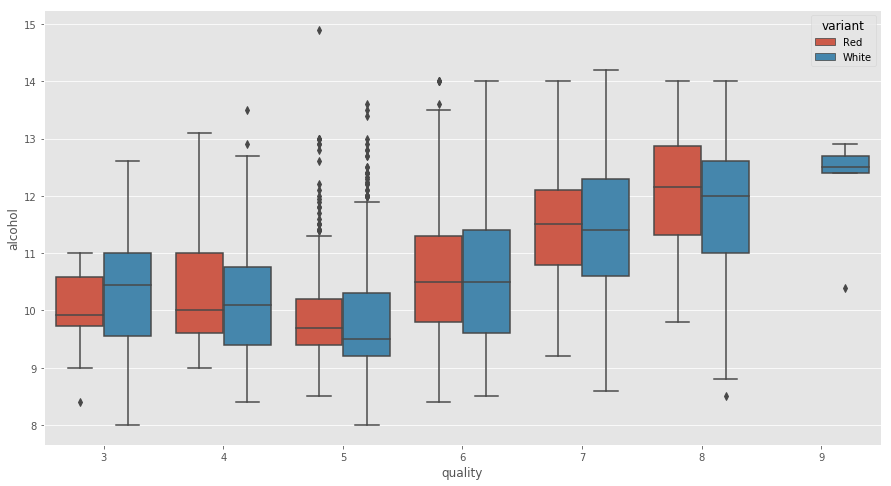

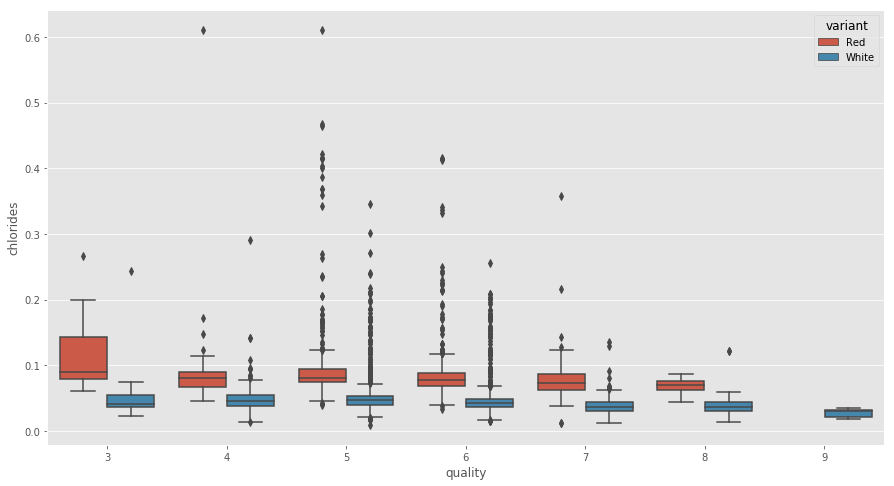

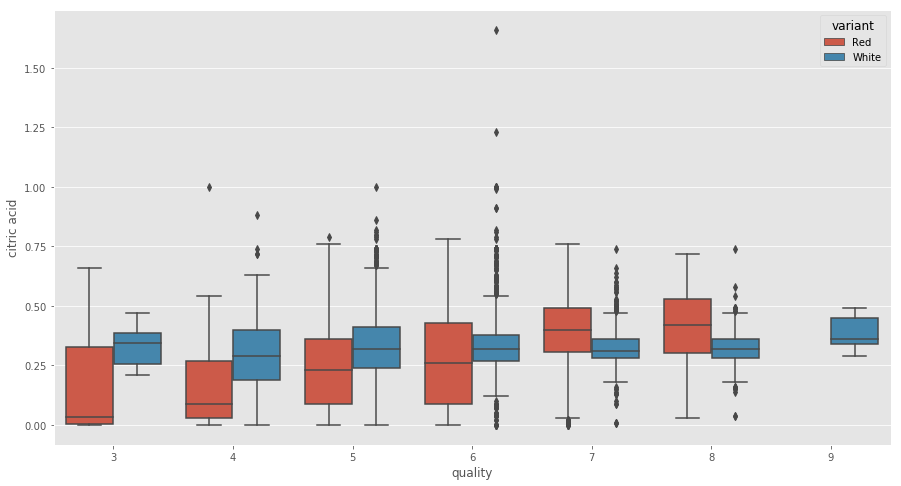

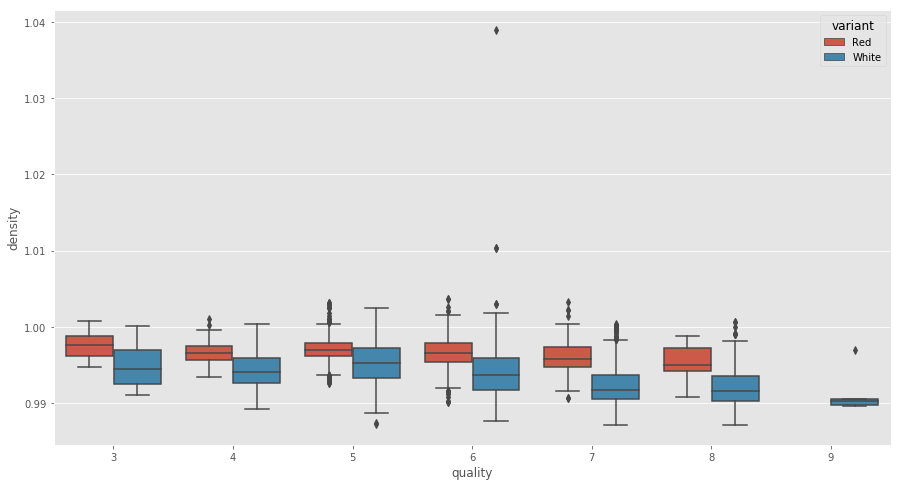

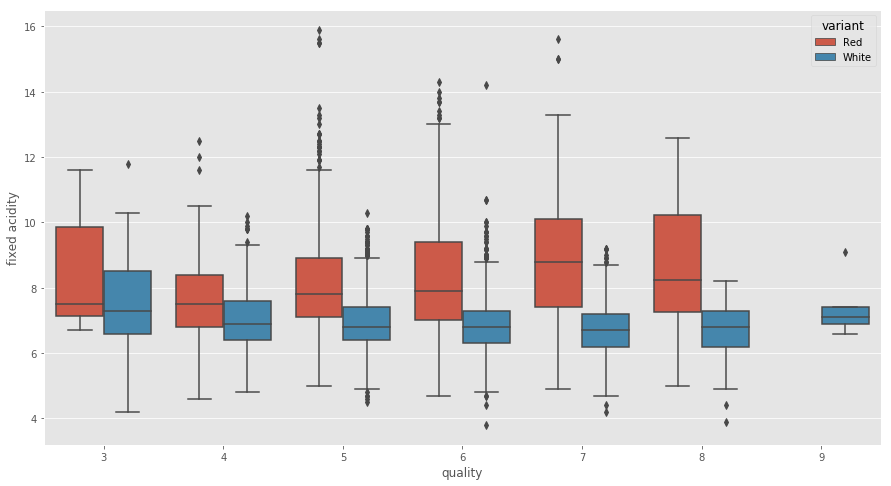

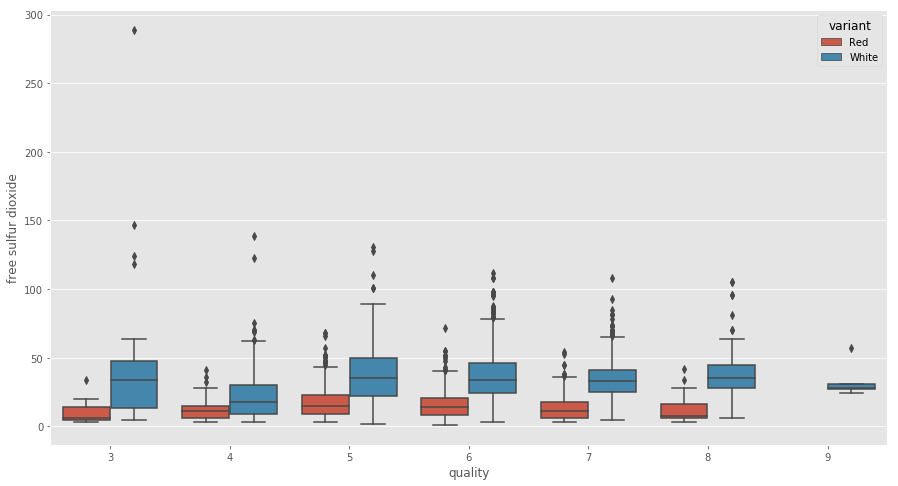

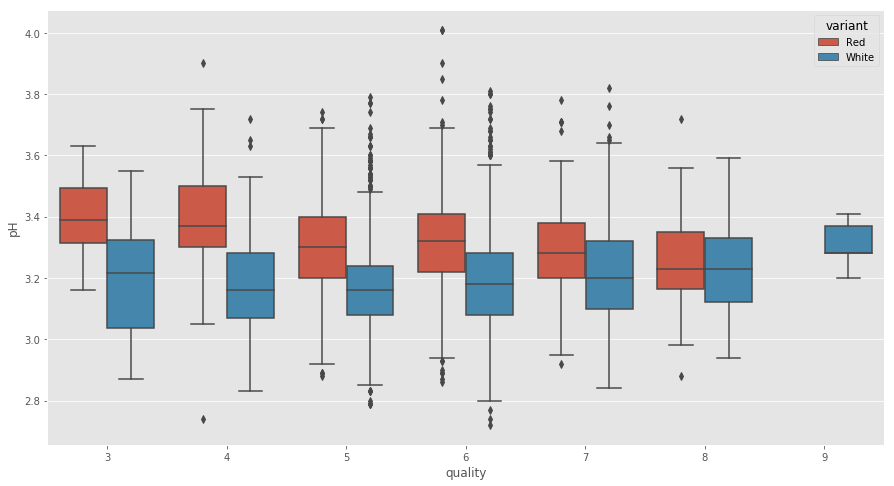

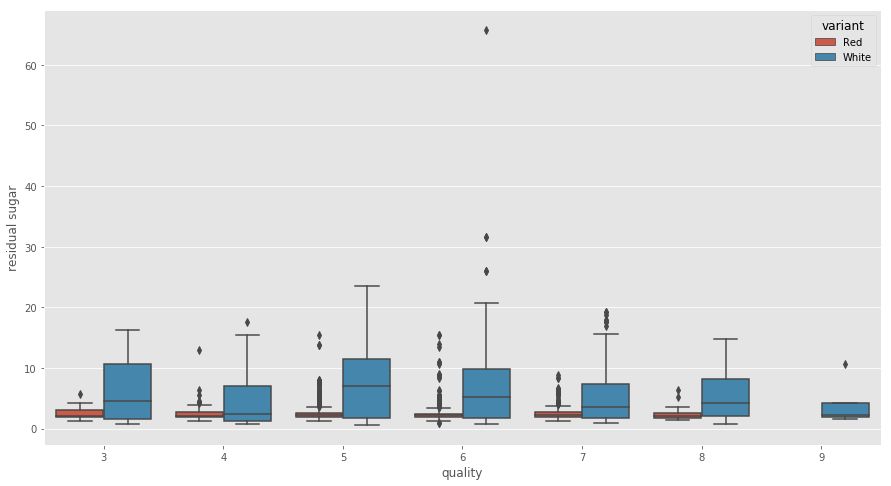

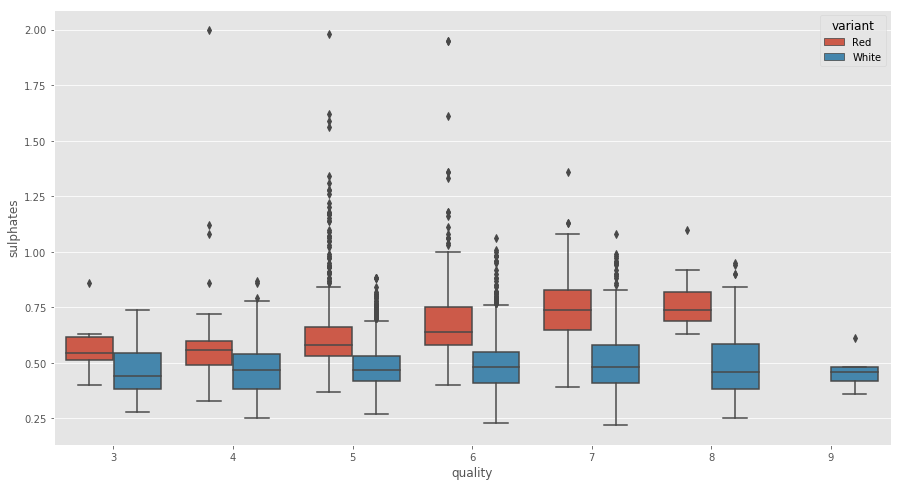

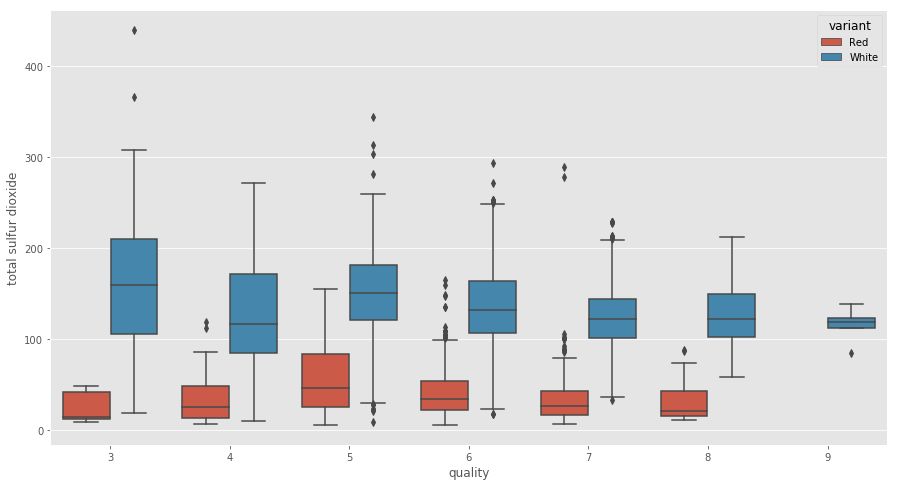

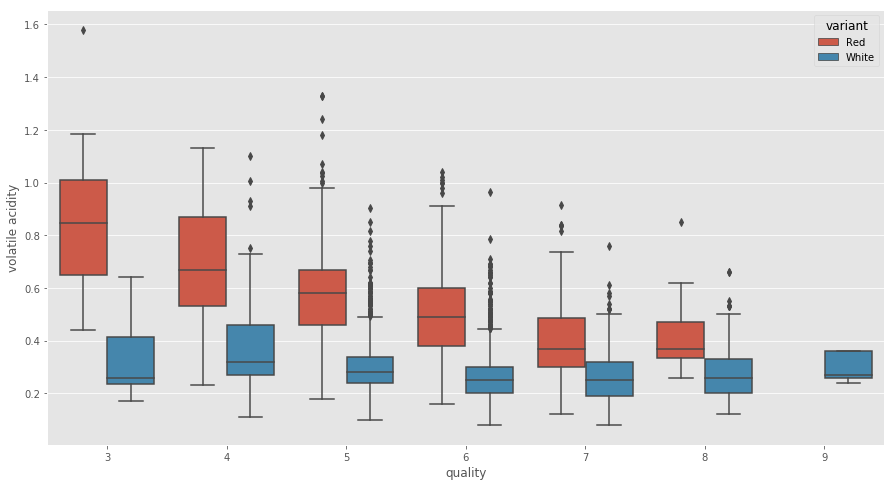

In [18]:
for col in sorted(wine_all.columns):
    if col in ['quality', 'variant']:
        continue
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='quality', y=col, hue='variant', data=wine_all)

The box and whisker plots above may look a bit crowded, but they do convey important information. 

In simple terms, a 'box' stands for the data between 25th and 75th percentiles, with the 50th percentile (median) represented by a solid black line. 'Whiskers' represent other data, except the ones which are recognised as outliers (black dots). Outliers, in turn, are identified from interquartile ranges. 

Across many features, the number of outliers is significant, and they require considerations for remediation and/or exclusion from future analysis. In some cases though, they may actually be true values. For example, the white wine with free sulphur dioxide of around 300, when the median is below 50 for all, might indeed have its lowest grade justified. 

### Violin Plots

Let's explore some other plots. Violin plots are similar to box plots, but also provide some information on the shape  of features' distribution (in particular, some idea on their skewness and kurtosis). There, too, we can see a large number of outliers.

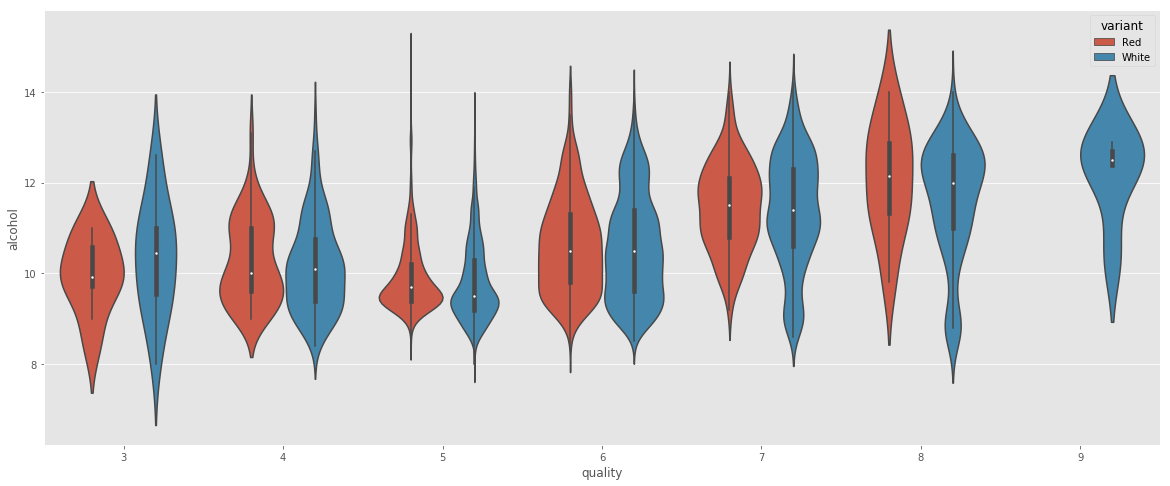

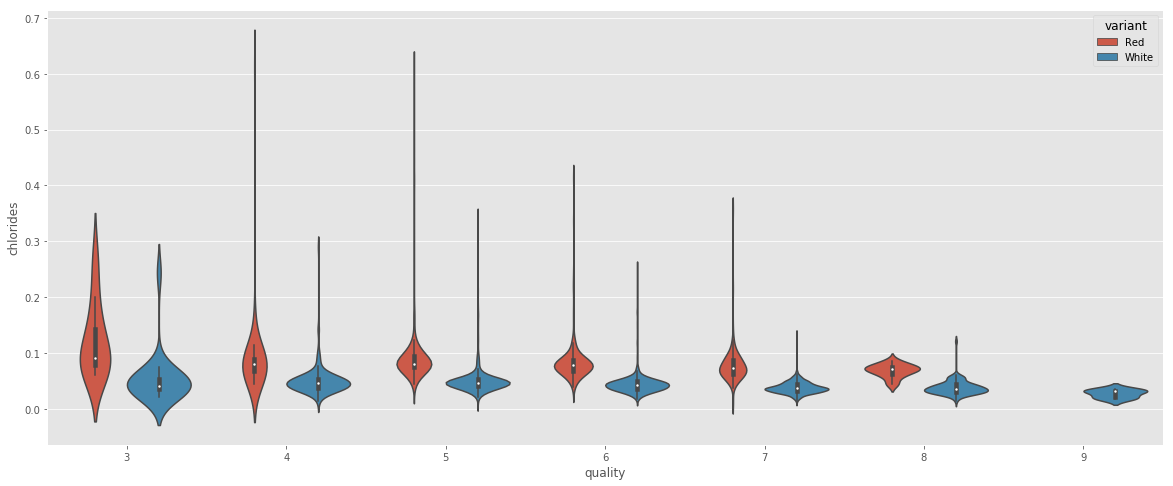

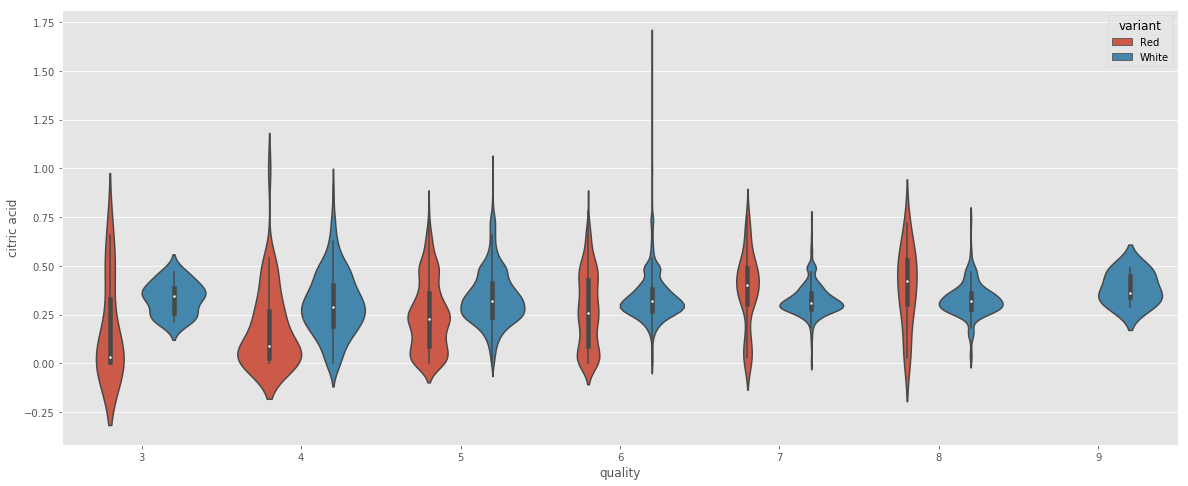

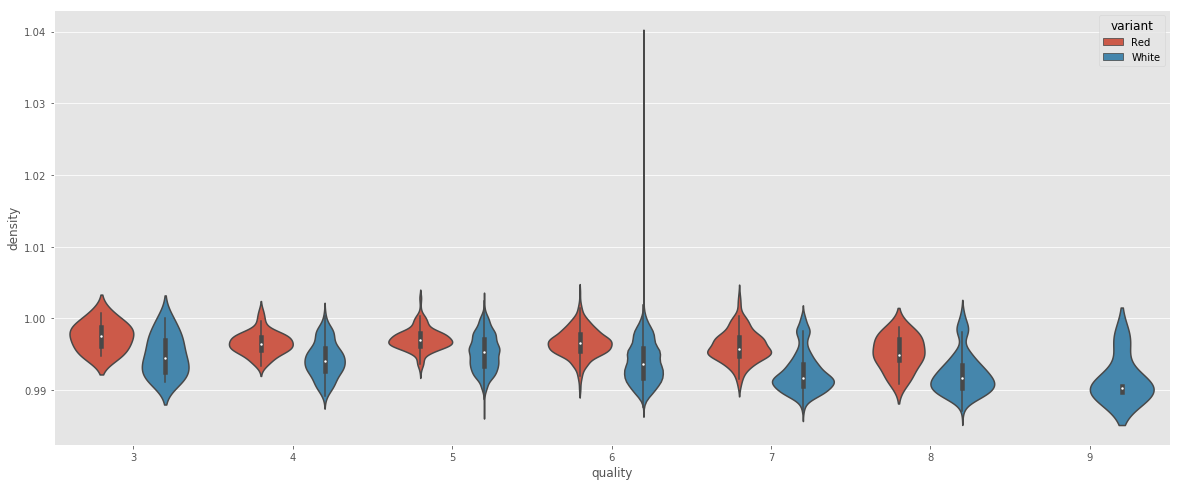

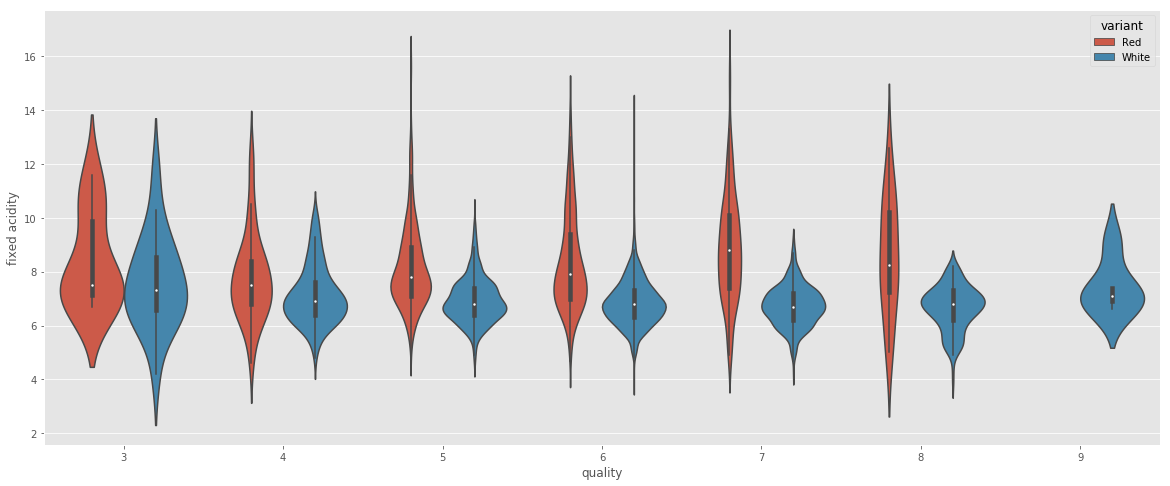

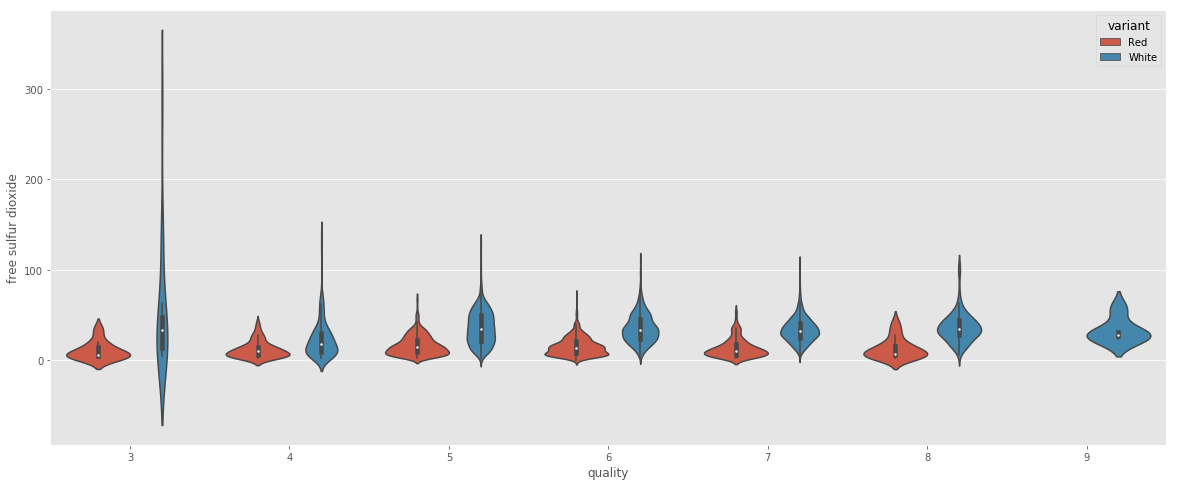

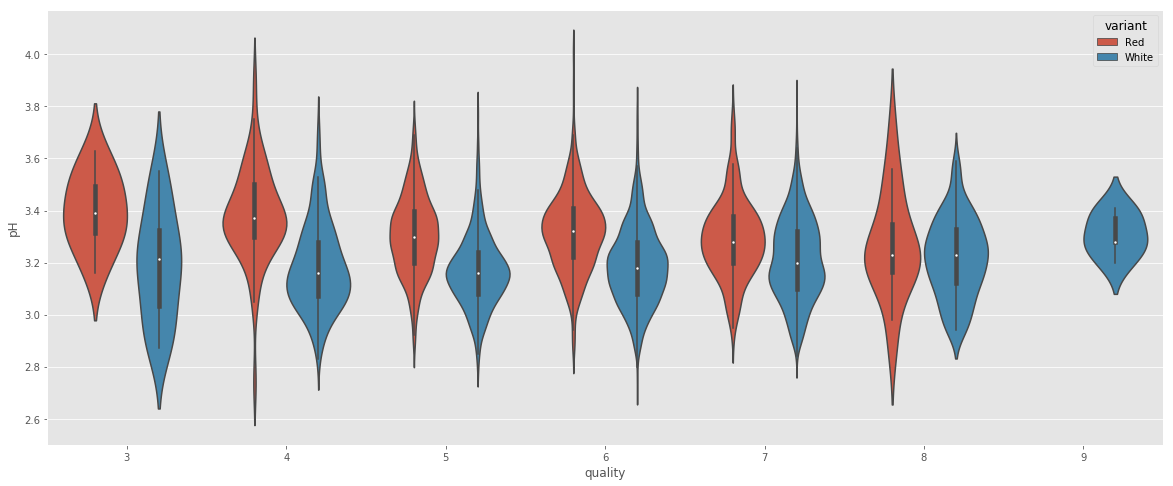

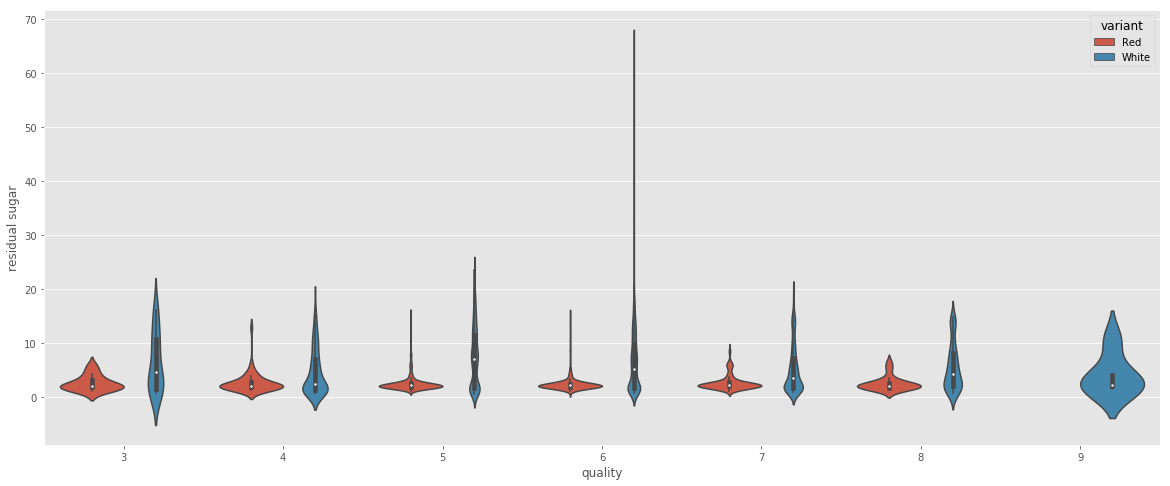

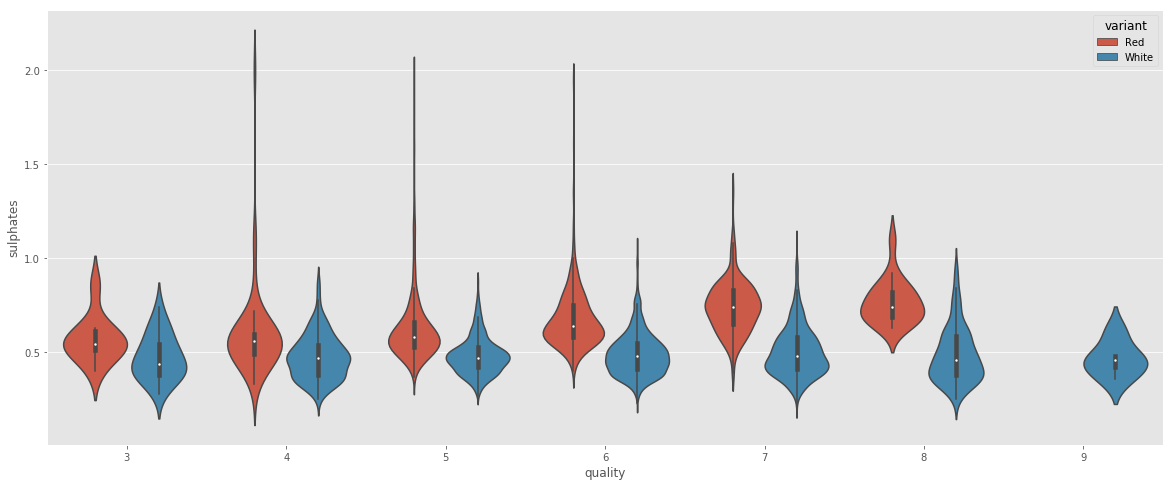

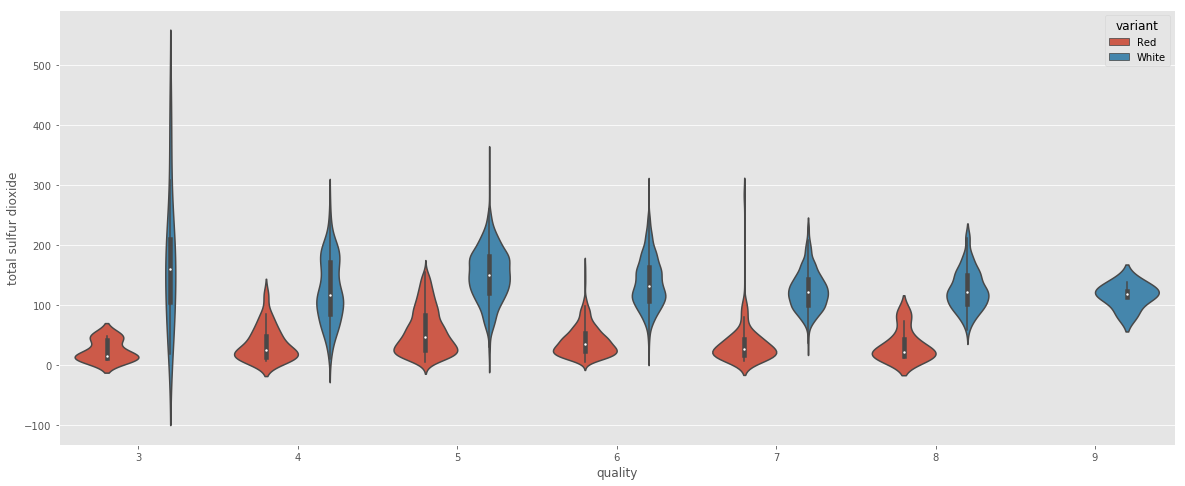

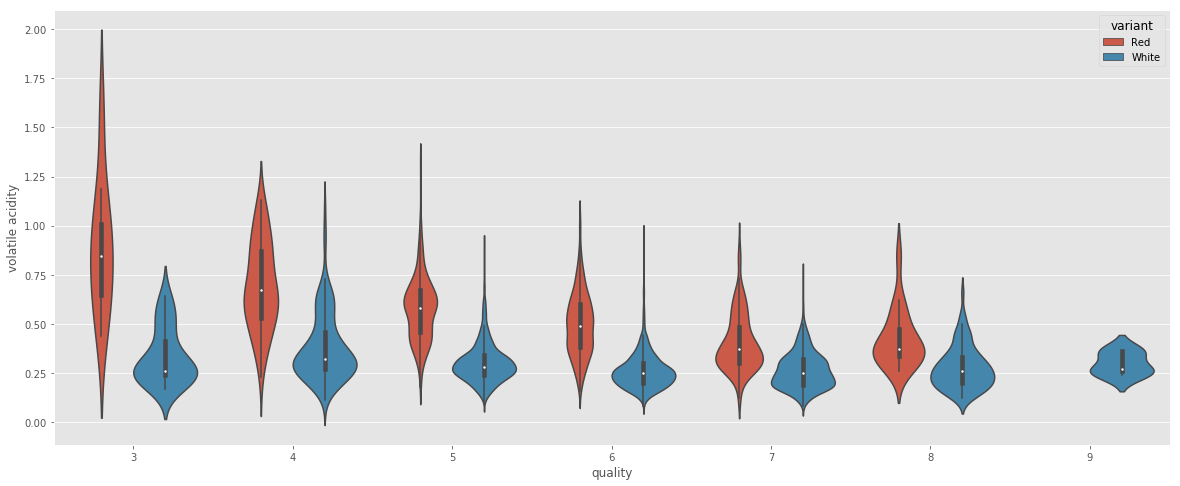

In [19]:
for col in sorted(wine_all.columns):
    if col in ['quality', 'variant']:
        continue
    plt.figure(figsize=(20, 8))
    sns.violinplot(x='quality', y=col, hue='variant', data=wine_all)

### Pair Plots

As part of our exploratory data analysis, we should also look at features' codependence structure, particularly with the target (quality). It is worth mentioning, however, that in this case, this is complicated, because the target is discrete rather than continuous. This implies that a 'naive' approach to correlation figures may be misleading.

In the pairplots below, darker colours indicate higher quality. Ideally, we want to see something similar to a 'gradient', with increasing darkness of dots corresponding to higher (or lower) values of certain features (which we than could, hopefully, use as predictors for our target). 

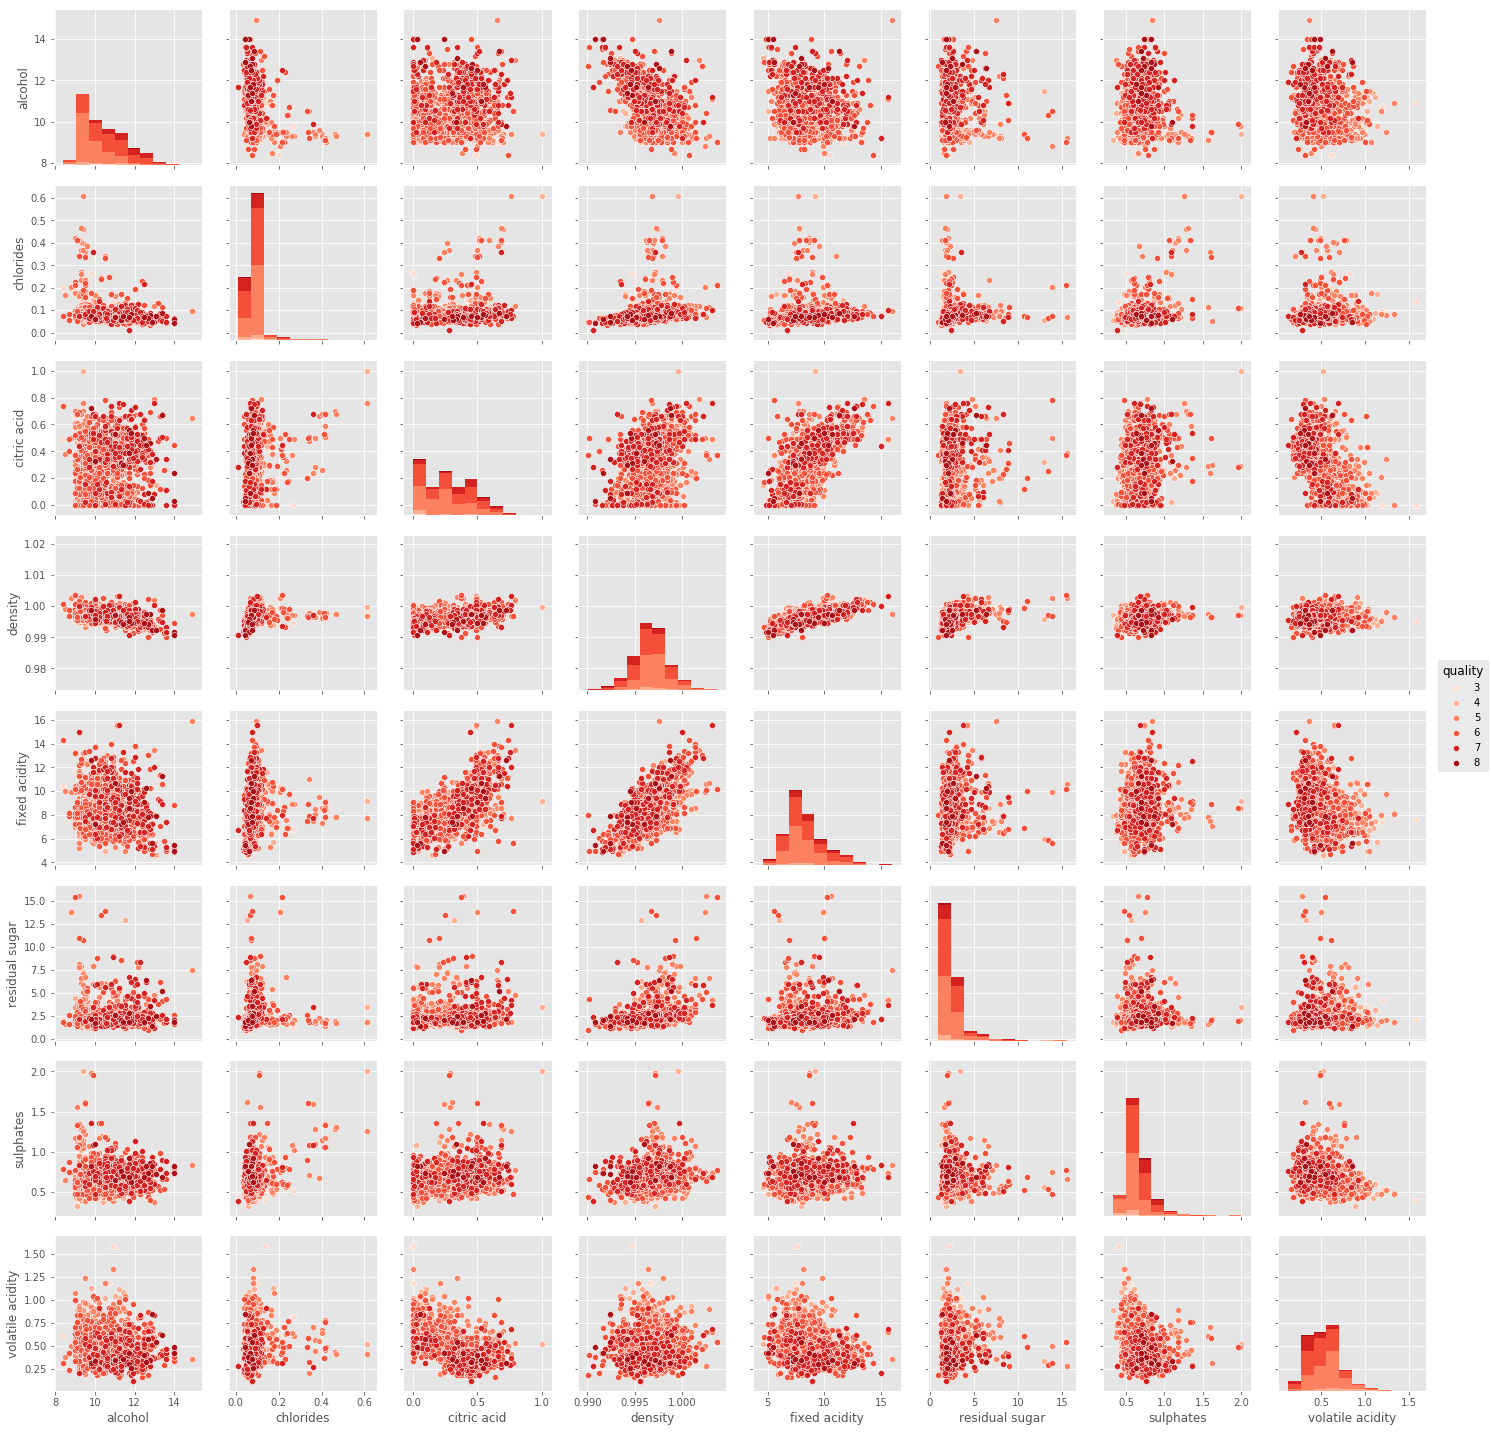

In [20]:
vars = sorted(['chlorides', 'fixed acidity', 'volatile acidity', 'residual sugar', 
               'citric acid', 'density', 'sulphates', 'alcohol'])
sns.pairplot(red, hue='quality', palette='Reds', vars=vars)

Similarly to our previous guess, it looks like alcohol and some acidity features may have some predicting power for red wine.

High content of chlorines can be reflective of low quality, but the number of samples (i.e. individual observations) with high content is quite low, which potentially makes this feature less useful. 

Let's do the same for white wine. 

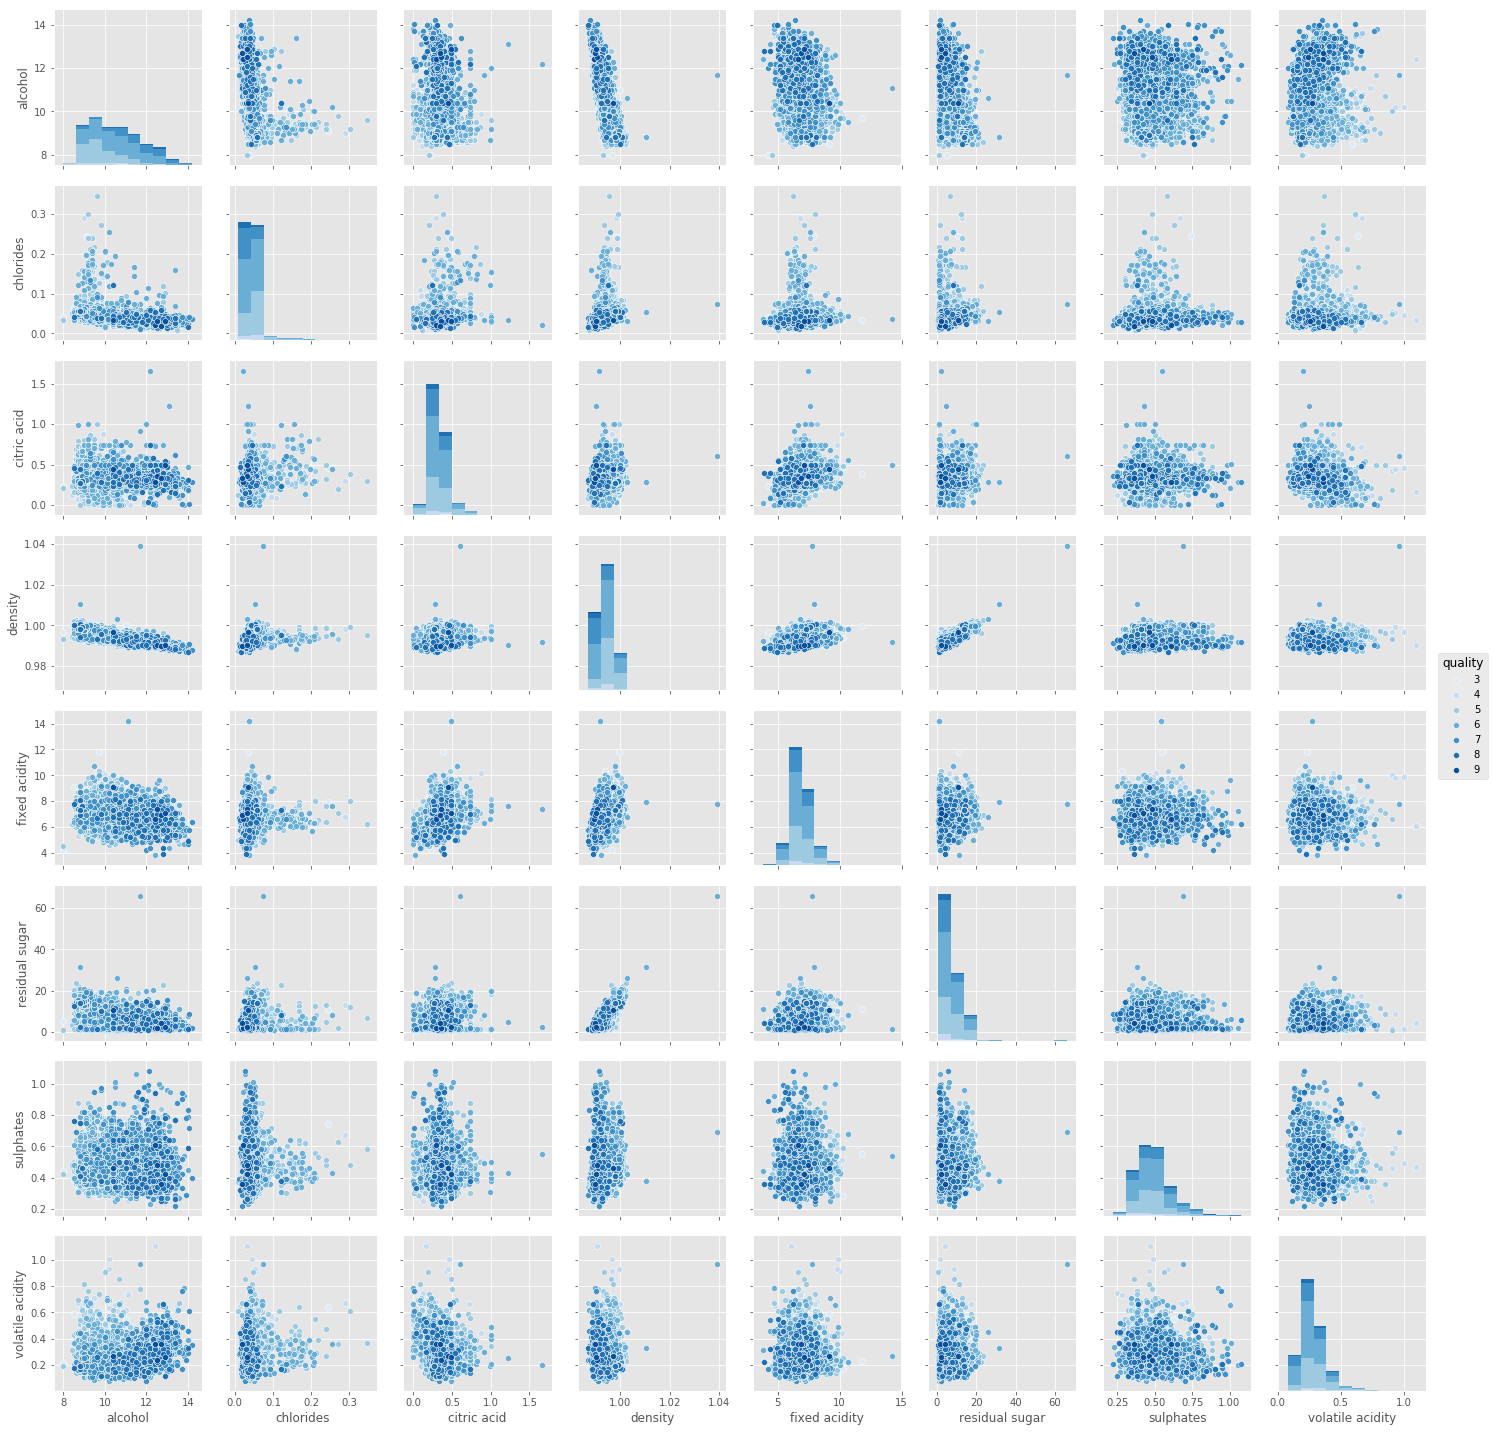

In [21]:
vars = sorted(['chlorides', 'fixed acidity', 'volatile acidity', 'residual sugar', 
               'citric acid', 'density', 'sulphates', 'alcohol'])
sns.pairplot(white, hue='quality', palette='Blues', vars=vars)

Chlorides, in the second column from left, seems to be the most useful feature for white wine (the lower the better), and so do alcohol and, to a lower extent, some acidity features.  

### Correlation

In [22]:
red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [23]:
red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

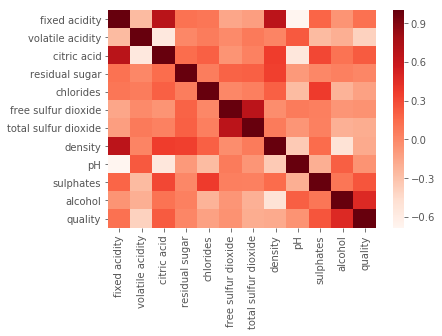

In [24]:
sns.heatmap(red.corr(), cmap='Reds')

In [25]:
white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [26]:
white.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

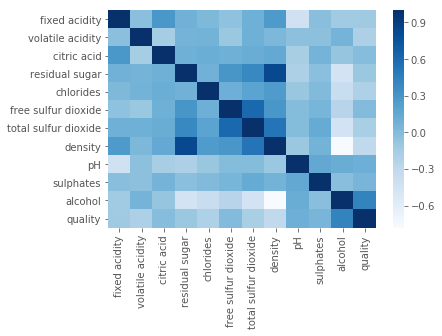

In [27]:
sns.heatmap(white.corr(), cmap='Blues')

Correlation, particularly with categorical variables, should be taken with caution. In this case, there is some (limited) meaning behind it, since there are around 8 categories altogether, and since the categories are ordinal rather than cardinal, and hence, for example, wine with quality of 8 is 'better' than that of quality 3. However, we can not infer that, for example, the difference between wines of quality 3 and 4 is the same as, say, between 6 and 7. 

For the features, which are effectively continuous, unlike the target, correlation analysis is more useful. However, that said, another significant limitation of correlation is that it measures only linear dependence. Nonlinear dependencies (e.g. if y = x^2) are not going to be captured. If that is a known issue, we may consider using other functional forms (e.g. adding quadratic and cubic features, as well as their products), which is relatively easy to implement in scikit-learn.

An additional point of consideration: some variables are effectively redundant (e.g. pH and acidity, since acidity is pretty much what pH measures). Correlation between features is generally undesirable (especially for regression algorithms, where multicollinearity can be a serious issue) and has to be dealt with during preprocessing. 

What kind of information can we infer from all of the above so far? 
We can see some differences and potentially interesting patterns.
    
1. White wine tends to contain less chlorides
2. White wine tends to contain more cytric acid
3. Free and residual sulphates values are conciderably higher for White
4. Total sulphur dioxide is much higher for White
5. Volatile acidity is higher for Red
6. Higher-grade Red and white tend to be heavier on alcohol
7. Higher citric accid is associated with higher grade for Red, but not White
8. Same as above for fixed acidity
9. Free suplhur dioxide increases for Red with grades, and then decreases
10. Highger grade for red is apparently related to low volatile acidity.
 
This, of course, is not sufficient for conclusions, but let's consider some possible predictors of quality.
These will need to be paid more attention to later. 

Red: chloride (negative relationship), citric acid (positive), 
fixed accidity (positive), sulphates (positive), volatile acidity (negative),

White: alcohol (positive), chlorides (negative), residual sugar (negative), 
total sulphur dioxide (negative)

## PREPROCESSING

In simple terms, preprocessing refers to operations like identifying and filling missing data (e.g. by forward- or backfilling, imputing with means or medians, or filling with zeros or other static values), dealing with outliers, rescaling the features (e.g. to put them all on the same scale from 0 to 1), adding new features (e.g. squares of some available features), and transforming the data in other ways. 

In the 'real world', it is often a tedious and time-consuming process, since data are rarely clean and free from issues, but also quite an important one. Most scikit-learn algorithms can't even handle missing data, and many are sensitive to outliers (though not all of them). Though not particularly elegant, the 'garbage in garbage out' rule tends to make sense. Moreover, data quality issues aside, in many cases feature engineering is the key step to building a succesful predictive model. Finding, for example, a pair of features whose product has significant predictive power may be more far more important than fine-tuning some hyperparameters for a sophisticated algorithm. 

Since the dataset has no missing values, but is full of outliers (as we have learned from plots above), we should start with dealing with outliers first.

However, even before we do any transformation to the data, we should split each dataset into training and testing parts. This is needed primarily to avoid overfitting during training (which, in simple terms, means fitting 'noise' along with 'signal'). Once we are done with the harder parts of model development and validation, we want to test our models on the data they have never 'seen' before. The test sets, for this reason, will never be used for training. 

### Train/Test Split

In many cases in machine learning, picking samples at random for the train and test subsets will do the job. Unfortunately, ours is not the case.

The problem, as we have seen earlier, is that our quality groups are very unbalanced: there is a lot more mediocre wine than good or bad wine. This, in addition, may potentially lead to some training problems, but that will be addressed later.

For our train/test split, we should do stratified sampling instead, or we are at risk of introducing bias. Practically, we want our train and test subsets to have the exact same proportions of the data across quality groups as in the full dataset. 

There is no exact rule on how much data to set aside (there is sort of a tradeoff with lower risks of overfitting and better model training), but in many cases 20-30% is a sufficient choice.

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2) # 1 shuffle, 20% of the data set aside
for train_index, test_index in sss.split(red, red['quality']):
    red_train = red.loc[train_index]
    red_test = red.loc[test_index]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2) # same as for red wine, but should initialise a 'blank' new instance
for train_index, test_index in sss.split(white, white['quality']):
    white_train = white.loc[train_index]
    white_test = white.loc[test_index]

Let's see whether it worked

In [29]:
print("Original Red shape")
print(red.shape)

Original Red shape
(1599, 13)


In [30]:
print("Train Red shape")
print(red_train.shape)

Train Red shape
(1279, 13)


In [31]:
print("Test Red shape")
print(red_test.shape)

Test Red shape
(320, 13)


In [32]:
len(red_test) / len(red) # expect to see 20% here

0.20012507817385866

In [33]:
len(red_train) / len(red) # expect to see 80% here

0.7998749218261413

In [34]:
red.quality.value_counts().sort_index() / len(red) # proportions for each quality group in the full set

3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: quality, dtype: float64

In [35]:
red_test.quality.value_counts().sort_index() / len(red_test) # should be the same as above for train and test

3    0.006250
4    0.034375
5    0.425000
6    0.400000
7    0.125000
8    0.009375
Name: quality, dtype: float64

In [36]:
red_train.quality.value_counts().sort_index() / len(red_train)

3    0.006255
4    0.032838
5    0.426114
6    0.398749
7    0.124316
8    0.011728
Name: quality, dtype: float64

Alright, that's good for red wine. Just to be sure, let's check the same for white wine too

In [37]:
print("Original White shape")
print(white.shape)

Original White shape
(4898, 13)


In [38]:
print("Train White shape")
print(white_train.shape)

Train White shape
(3918, 13)


In [39]:
print("Test White shape")
print(white_test.shape)

Test White shape
(980, 13)


In [40]:
len(white_test) / len(white) # expect to see 20% here

0.2000816659861168

In [41]:
len(white_train) / len(white) # expect to see 80% here

0.7999183340138832

In [42]:
white.quality.value_counts().sort_index() / len(white) # proportions for each quality group in the full set

3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: quality, dtype: float64

In [43]:
white_test.quality.value_counts().sort_index() / len(white_test) # should be the same as above for train and test

3    0.004082
4    0.033673
5    0.296939
6    0.448980
7    0.179592
8    0.035714
9    0.001020
Name: quality, dtype: float64

In [44]:
white_train.quality.value_counts().sort_index() / len(white_train)

3    0.004084
4    0.033180
5    0.297601
6    0.448698
7    0.179684
8    0.035733
9    0.001021
Name: quality, dtype: float64

Good. Looks like we have managed to split the data into training and test sets preserving the same proportions for quality groups as in the full set. Now, we'll leave the test set completely aside and *won't touch it at all* until the final stage.

Now that we have workable train and test sets, we can start working on data preprocessing. Two problems noticed earlier was a large number of outliers and widely different feature scales. Let's start with outliers.

### Outliers

Outlier detection is, unfortunately, a complicated business, and there is no single 'one size fits all' method to deal with them. In essence, there are at least two problems here: detecting outliers and remediating them (or not, if they are justified).

As for the detection part, there are several methods one can utilize. We can look, for example, at standard scores (aka z-scores, normal scores), which means, roughly, substracting the mean and dividing by standard deviation. With this simplistic approach, an outlier will be a variable with an absolute z-score of 3 and above (i.e. roughly 3 or more standard deviations away from the mean). In scikit-learn, we can use the StandardScaler class to do it easily.

Another method will be to look at features interquartile range: the difference between the first and third quartiles. Specifically, outliers can be defined, on a rule of thumb basis, as any observation lower than 1.5 IQRs than the 1st quartile or higher than 1.5 IQRs than the third quartile. 

More advanced methods are available. These include, for example, methods like Elliptic Envelope and Isolation Forests.

We could, in theory, apply a simplistic approach, detect outliers, and then remove them from all features (e.g. something like np.where(abs(scaled_df) > 3, 3, abs(scaled_df)), as one way), but this will likely be a wrong solution. First of all, it is important to understand where outliers come from. Erroneous data (resulting, for example, from manual inputs typed incorrectly) need to be remediated, but in some cases, outliers may be more a 'feature' than a 'bug'. In our example, it is plausible that some wine samples just happen to have a lot more sugar or sulphur than the norm, which may be helpful to predict their low or high quality. 

One approach implemented in some cases is to drop all samples (i.e. individual observations) which contain outliers and/or missing data. This is generally not recommended, since it is likely to lead to discarding a large amount of data without issues.

That said, having features on such different scales, especially with outliers, is not a good start (not least because in some algorithms, like K-Means clustering, this will lead to unjustified high 'weight' of such features), and some action is needed. 

Since the number of outliers is large and they seem to be mostly genuine, we can use RobustScaler, to alleviate the issue with outliers and different scales in one go. This will be an imperfect, but potentially workable solution.

However, the problem is that it will not work for all algorithms. Gaussian Naive Bayes, for example, implements its own standardization (substracting the mean and dividing by standard deviation) for each feature, and some algorithms, including Decision Trees, actually may work better without standardization.

### Feature Scaling

In [86]:
red_train_y = red_train['quality'].copy().reset_index(drop=True) # in this case, indices have no useful information
red_train_X = red_train.iloc[:, :-1].copy()

white_train_y = white_train['quality'].copy().reset_index(drop=True)
white_train_X = white_train.iloc[:, :-1].copy()

red_test_y = red_test['quality'].copy().reset_index(drop=True)
red_test_X = red_test.iloc[:, :-1].copy()

white_test_y = white_test['quality'].copy().reset_index(drop=True)
white_test_X = white_test.iloc[:, :-1].copy()

In [87]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
red_train_scaled_X = rs.fit_transform(red_train_X)
red_train_scaled_X = pd.DataFrame(red_train_scaled_X, columns=red_train_X.columns)

rs = RobustScaler()
white_train_scaled_X = rs.fit_transform(white_train_X)
white_train_scaled_X = pd.DataFrame(white_train_scaled_X, columns=white_train_X.columns)

rs = RobustScaler() 
# generally, scaling for the test set is done later, as part of a production pipeline, but we can do it now for demonstration
red_test_scaled_X = rs.fit_transform(red_test_X)
red_test_scaled_X = pd.DataFrame(red_test_scaled_X, columns=red_test_X.columns)

rs = RobustScaler()
white_test_scaled_X = rs.fit_transform(white_test_X)
white_test_scaled_X = pd.DataFrame(white_test_scaled_X, columns=white_test_X.columns)

Let's see whether it worked

In [47]:
red_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
424,7.7,0.960,0.20,2.00,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5,Red
1053,8.3,0.330,0.42,2.30,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7,Red
1044,6.4,0.390,0.33,3.30,0.046,12.0,53.0,0.99294,3.36,0.62,12.2,6,Red
1268,6.9,0.410,0.31,2.00,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6,Red
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,Red


In [48]:
red_train.mean()

fixed acidity            8.349257
volatile acidity         0.527869
citric acid              0.276763
residual sugar           2.567045
chlorides                0.087414
free sulfur dioxide     15.949961
total sulfur dioxide    46.530884
density                  0.996788
pH                       3.310539
sulphates                0.660102
alcohol                 10.418934
quality                  5.637217
dtype: float64

In [49]:
red_train.std()

fixed acidity            1.780875
volatile acidity         0.181704
citric acid              0.196258
residual sugar           1.452398
chlorides                0.045380
free sulfur dioxide     10.473560
total sulfur dioxide    33.103740
density                  0.001886
pH                       0.156300
sulphates                0.171389
alcohol                  1.054027
quality                  0.808633
dtype: float64

In [50]:
red_train_scaled_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.090909,1.76,-0.181818,-0.285714,-1.571429,0.071429,0.550,-0.549889,0.263158,-1.000000,0.4375,-1.0
1,0.181818,-0.76,0.484848,0.142857,-0.476190,-0.357143,-0.450,-1.099778,0.368421,0.833333,1.5625,1.0
2,-0.681818,-0.52,0.212121,1.571429,-1.619048,-0.142857,0.375,-1.685144,0.263158,0.000000,1.2500,0.0
3,-0.454545,-0.44,0.151515,-0.285714,-0.047619,0.500000,0.325,-0.026608,0.842105,-0.388889,-0.4375,0.0
4,-0.227273,2.66,-0.787879,2.928571,0.809524,-0.642857,-0.600,-0.062084,1.684211,-0.444444,0.3125,-3.0


In [51]:
red_train_y.head()

0    5
1    7
2    6
3    6
4    3
Name: quality, dtype: int64

In [52]:
red_train_scaled_X.mean()

fixed acidity           0.204208
volatile acidity        0.031478
citric acid             0.050797
residual sugar          0.524349
chlorides               0.353066
free sulfur dioxide     0.139283
total sulfur dioxide    0.213272
density                 0.021268
pH                      0.002839
sulphates               0.222787
alcohol                 0.136834
quality                -0.362783
dtype: float64

In [53]:
red_train_scaled_X.std()

fixed acidity           0.809489
volatile acidity        0.726818
citric acid             0.594721
residual sugar          2.074854
chlorides               2.160971
free sulfur dioxide     0.748111
total sulfur dioxide    0.827594
density                 0.836411
pH                      0.822634
sulphates               0.952159
alcohol                 0.658767
quality                 0.808633
dtype: float64

In [54]:
white_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
1934,6.8,0.28,0.36,1.60,0.040,25.0,87.0,0.99240,3.23,0.66,10.3,6,White
2439,7.3,0.27,0.37,9.70,0.042,36.0,130.0,0.99790,3.48,0.75,9.9,6,White
3461,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,White
3177,5.6,0.41,0.22,7.10,0.050,44.0,154.0,0.99310,3.30,0.40,10.5,5,White
1367,7.6,0.27,0.24,3.80,0.058,19.0,115.0,0.99580,3.15,0.45,8.9,5,White


In [55]:
white_train.mean()

fixed acidity             6.864599
volatile acidity          0.278196
citric acid               0.335447
residual sugar            6.438361
chlorides                 0.045608
free sulfur dioxide      35.236090
total sulfur dioxide    138.446274
density                   0.994058
pH                        3.188298
sulphates                 0.490151
alcohol                  10.508669
quality                   5.877999
dtype: float64

In [56]:
white_train.std()

fixed acidity            0.843423
volatile acidity         0.100514
citric acid              0.121370
residual sugar           5.102068
chlorides                0.020815
free sulfur dioxide     16.515480
total sulfur dioxide    42.598046
density                  0.003007
pH                       0.151839
sulphates                0.115063
alcohol                  1.227357
quality                  0.885547
dtype: float64

In [57]:
white_train_scaled_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,0.181818,0.333333,-0.448171,-0.214286,-0.391304,-0.810345,-0.310112,0.253165,1.285714,-0.052632,0.0
1,0.5,0.090909,0.416667,0.539634,-0.071429,0.086957,-0.068966,0.925843,1.518987,1.928571,-0.263158,0.0
2,-0.1,-0.181818,-0.166667,-0.173780,-0.071429,3.086957,0.775862,-0.424719,-0.708861,0.785714,0.473684,2.0
3,-1.2,1.363636,-0.833333,0.222561,0.500000,0.434783,0.344828,-0.152809,0.607595,-0.571429,0.052632,-1.0
4,0.8,0.090909,-0.666667,-0.179878,1.071429,-0.652174,-0.327586,0.453933,-0.151899,-0.214286,-0.789474,-1.0


In [58]:
white_train_y.head()

0    6
1    6
2    8
3    5
4    5
Name: quality, dtype: int64

In [59]:
white_train_scaled_X.mean()

fixed acidity           0.064599
volatile acidity        0.165414
citric acid             0.128722
residual sugar          0.141873
chlorides               0.186283
free sulfur dioxide     0.053743
total sulfur dioxide    0.076660
density                 0.062415
pH                      0.042013
sulphates               0.072504
alcohol                 0.057194
quality                -0.122001
dtype: float64

In [60]:
white_train_scaled_X.std()

fixed acidity           0.843423
volatile acidity        0.913768
citric acid             1.011416
residual sugar          0.622203
chlorides               1.486814
free sulfur dioxide     0.718064
total sulfur dioxide    0.734449
density                 0.675628
pH                      0.768804
sulphates               0.821881
alcohol                 0.645978
quality                 0.885547
dtype: float64

The rescaled values are hardly recognisable now, but look somewhat more 'manageable'. The scales are still different, as are means and variances, but they are now much closer to each other, and outliers are not as large any more. The 'regular' Standard Scaler (which involves substracting the mean and dividing by the standard deviation) results in all features having the same mean of 0 and standard deviation of 1. Both, however, are highly affected by outliers, hence the Robust Scaler (which relies on the median and interquartile range instead) was used.

Standardization is particularly important for algorithms which require calculating distances between samples, and K Nearest Neighbours (explored below) is one of them.

The target (quality) was removed and is saved as a separate variable. 

Here is an excerpt of what exactly the robust scaler is supposed to do, from official documentation.

*"This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).*

*Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.*

*Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results."*

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

Alright, now we seem to have everything to start the more interesting part. That is, the 'real' machine learning itself.

## MODEL TRAINING AND TESTING

### Classification vs Regression

One of the most important and consequential desicions one needs to make before doing any calculations is how to frame the problem? Since we are dealing with exact targets, and this is exactly what the model needs to predict, this is effectively a supervised machine learning problem (though, of course, unsupervised methods including clustering and PCA can be combined with it to improve the results). A more difficult question would be: should we approach this problem as a classification or a regression one?

To an extent, both approaches can be justified. For the classification task, we have a small number of 'labels' which we can try to predict, in a way similar to predicting, for example, flower species, in the famous Iris dataset. However, approaching this problem with the same methods in a naive way (e.g. using one-hot encoding to transform the target) will be a mistake, since we will implicitly treat quality level of 8 as different from 7 as, for example, from 3. The target is ordinal, and the order contains important information, which should not be discarded. With this respect, regression methods may be justified too: we will obtain a continuous output, which will then need to be discretized. In this case, our performance measure (e.g. mean square error) may account for the fact that predicting quality of 7 instead of 8 is much less of a mistake than predicting 3 instead of 8. Performance measures used for classification (e.g. accuracy, precision, recall) will treat the two errors the same. 

With this tradeoff in mind, let's try to tackle this problem from the classification front first and see whether it works.

Before, however, we need to set up a benchmark: some baseline to compare our model results agains and something we should try to outperform. 

### Baseline Model

For classification tasks, the most straightforward thing to do is to find the most common class and simply predict every observation as belonging to it. For regression, we can simply predict every output as equal to the mean of the target.

Let's see how it can do for red and white wine.

In [61]:
red.quality.value_counts() / len(red)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [62]:
white.quality.value_counts() / len(white)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

If we simply predict quality 5 for red wine and 6 for white wine, for every sample in the respective train sets, without using any machine learning at all, we would get around 43% and 45% accuracy respectively. This, of course, is not much, but the baseline is intended to establish the lowest limit. 

We can do 'better' than that. For classification problems, we can also simply check whether the model performs better than random guessing. To make it more related to the actual training set, the 'guessing' can be stratified, in the same proportions as observed for the target. 

In [63]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='stratified', random_state=0)
model.fit(red_train_X, red_train_y)
model.score(red_test_X, red_test_y)

0.375

In [64]:
model = DummyClassifier(strategy='stratified', random_state=0)
model.fit(white_train_X, white_train_y)
model.score(white_test_X, white_test_y)

0.33469387755102042

With (stratified) random guessing, we can get around 30-35% accuracy for red and white wine. 

### K-Nearest Neighbours 

K-Nearest Neighbours is one of the most simple classification algorithms. Intuitively, it is quite straightforward: to predict the label of a sample, we look at n other samples which are most similar to it, and pick the most common one. Similarity, in turn, is defined by a distance metric (e.g. Euclidean distance, the length of a line connecting them). 

Similarly to K-Means Clustering, the K-Nearest Neighbours algorithm calculates the distances between each and every pair of samples, taking all features into account. This is important, since for large datasets calculating all these distances may be computationally intensive, and hence impractical. The positive thing about the algorithm is that it can deal well with groups which are not linearly separable, where algorithms like logistic regression are likely to perform worse. 

The algorithm, however, requires certain hyperparameters, including the number of neighbours to take into account and the distance metric. The choice should depend on the specifics of the dataset and will likely impact model performance.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_red = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model_red.fit(red_train_scaled_X, red_train_y)

model_white = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model_white.fit(white_train_scaled_X, white_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

We now have a trained model which we can (in theory) use for prediction. 

However, assessing its usefulness based on the training set alone will be a wrong thing to do: we need to use the data our model has never 'seen' before. Let's see how it is going to perform against our holdout test set

In [89]:
red_test_y_pred = model_red.predict(red_test_scaled_X) # the output will actually be a numpy array, rather than a pandas series
white_test_y_pred = model_white.predict(white_test_scaled_X)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(red_test_y, red_test_y_pred) # 

0.83750000000000002

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(white_test_y, white_test_y_pred) # percentage of correct predictions out of all predictions

0.90102040816326534

In [92]:
pd.crosstab(red_test_y, red_test_y_pred, rownames=['True'], colnames=['Predicted'], margins=True).T
# scikit-learn's own confusion matrix can be used too

True,3,4,5,6,7,8,All
Predicted,,,,,,,
3,1,0,0,0,0,0,1
4,1,6,3,0,0,0,10
5,0,5,126,18,0,0,149
6,0,0,7,109,14,0,130
7,0,0,0,1,26,3,30
All,2,11,136,128,40,3,320


In [93]:
pd.crosstab(white_test_y, white_test_y_pred, rownames=['True'], colnames=['Predicted'], margins=True).T

True,3,4,5,6,7,8,9,All
Predicted,,,,,,,,
3,1,1,0,0,0,0,0,2
4,2,22,10,0,0,0,0,34
5,1,10,272,25,0,0,0,308
6,0,0,9,412,19,0,0,440
7,0,0,0,3,155,14,0,172
8,0,0,0,0,2,21,1,24
All,4,33,291,440,176,35,1,980


### Preliminary Results and Possible Next Steps

Interesting... Without any hyperparameter optimisation we have managed to achieve accuracy of over 83% and 90% on the test sets for red and white wine respectively, which is certainly way above our baseline. Does it mean we have built a very good model? Sadly, not necessarily so. As we can see in confusion matrices above, our classes are quite imbalanced, which, in general, suggests that we need to pay attention to other performance measures, including precision and recall.

Can we do better than that? Most likely, yes. One additional thing we need to do will be hyperparameter optimisation. Instead of 2 nearest neihbours we could try using, say, 3 or 10. Also, we can try to experiment with other distance measures, including Manhattan distances. The right way to select the right set of hyperparameters will be to use what is known as Grid Search Cross Validation: this will involve splitting the train set into, say, five equally-sized folds, training a model on four of them, with a specific set of hyperparameters, assessing agains the remaining fold. Each of the five folds is going to serve as a test set in turn. This can be done for all combinations of hyperparameters, with the goal to select the set performing the best, on average. This, potentially, can lead us to building a better model and improving our results.